In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Load dataset
dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

from sklearn.model_selection import train_test_split

# Split into training and test data (75/25)
train_X, test_X, train_y, test_y = train_test_split(dataset.drop('quality', axis=1), dataset['quality'])


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create a dictionary with hyperparameter values we want to test
gb_param = {'learning_rate': [0.05, 0.1, 0.15], # The "size" of each boosting step
            'n_estimators': [50, 100, 150]} # The number of gradient boosted trees to include in the ensemble

# Create an gridsearch object for finding the best hyperparameter values 
# for a gradient boosting classifier and fit (train) it on the training data
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param)
gb_grid.fit(train_X, train_y)

# IMPORTANT: gb_grid will in addition to performing the grid search to find the 
# best values also retrain a model using the best found values. This is controlled 
# the refit parameter in GridSearchCV. gb_grid can be use to score and predict using
# the retrained model.

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'n_estimators': [50, 100, 150]})

In [4]:
# Fetch cross-validation results into a pandas dataframe
gb_results = pd.DataFrame(gb_grid.cv_results_)
gb_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.797261,0.009916,0.003858,0.000200,0.05,50,"{'learning_rate': 0.05, 'n_estimators': 50}",0.625000,0.612500,0.658333,0.629167,0.615063,0.628013,0.016359,9
1,1.582131,0.013031,0.005111,0.000163,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.616667,0.641667,0.654167,0.620833,0.635983,0.633863,0.013734,7
2,2.379804,0.021927,0.006237,0.000168,0.05,150,"{'learning_rate': 0.05, 'n_estimators': 150}",0.629167,0.658333,0.670833,0.620833,0.644351,0.644704,0.018329,4
3,0.791710,0.004415,0.004140,0.000082,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.616667,0.629167,0.679167,0.612500,0.619247,0.631349,0.024530,8
4,1.599082,0.047434,0.005170,0.000212,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.604167,0.666667,0.675000,0.650000,0.648536,0.648874,0.024492,2
5,2.372215,0.011596,0.006196,0.000162,0.1,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.625000,0.650000,0.687500,0.645833,0.627615,0.647190,0.022406,3
6,0.791381,0.005593,0.004064,0.000309,0.15,50,"{'learning_rate': 0.15, 'n_estimators': 50}",0.595833,0.641667,0.662500,0.629167,0.652720,0.636377,0.023123,6
7,1.586721,0.012847,0.005166,0.000104,0.15,100,"{'learning_rate': 0.15, 'n_estimators': 100}",0.600000,0.666667,0.662500,0.637500,0.640167,0.641367,0.023725,5
8,2.384712,0.021987,0.006406,0.000152,0.15,150,"{'learning_rate': 0.15, 'n_estimators': 150}",0.612500,0.633333,0.687500,0.637500,0.690377,0.652242,0.031150,1


In [5]:
# For debug purposes. These values will be our x values in the plot
gb_results['param_learning_rate']

0    0.05
1    0.05
2    0.05
3     0.1
4     0.1
5     0.1
6    0.15
7    0.15
8    0.15
Name: param_learning_rate, dtype: object

In [6]:
# For debug purposes. These values will be our y values in the plot
gb_results['mean_test_score']

0    0.628013
1    0.633863
2    0.644704
3    0.631349
4    0.648874
5    0.647190
6    0.636377
7    0.641367
8    0.652242
Name: mean_test_score, dtype: float64

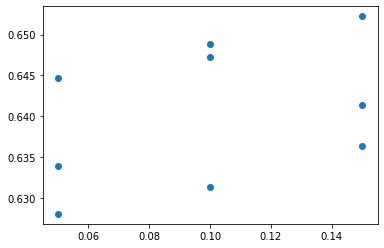

In [7]:
import matplotlib.pyplot as plt

# Plot the values directly
plt.scatter(gb_results['param_learning_rate'], gb_results['mean_test_score'])

In [8]:
# Find the average for each value of the learning_rate hyperparameter. We 
# have three results for each learning rate
mean_results = np.array_split(gb_results['mean_test_score'], 3)
mean_results_averaged = np.average(mean_results, axis=1)

# Do the same for the values themselves. We could alternatively select one of
# each value
x_values = np.average(np.array_split(gb_results['param_learning_rate'],3), axis=1)
x_values

array([0.05000000000000001, 0.10000000000000002, 0.15], dtype=object)

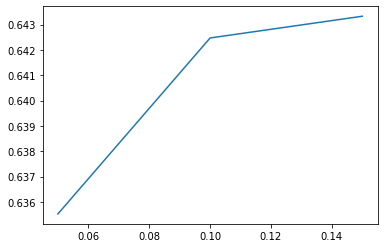

In [9]:
# Plot the average performance for each learning rate value tested
plt.plot(x_values, mean_results_averaged)